In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('/python.jup/electronics_store/kz.csv')

In [2]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [3]:
df=df[:50000]

In [4]:
df.shape

(50000, 8)

In [5]:
df.dtypes

event_time        object
order_id           int64
product_id         int64
category_id      float64
category_code     object
brand             object
price            float64
user_id          float64
dtype: object

In [6]:
df=df.query("event_time != '1970-01-01 00:33:40 UTC'")

In [7]:
df

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18
...,...,...,...,...,...,...,...,...
41475,2020-07-08 05:37:21 UTC,2348530228843774916,1515966223509105061,2.268105e+18,NaN,delonghi,74.75,1.515916e+18
41476,2020-07-08 05:37:22 UTC,2348530232148886470,1515966223509090236,2.268105e+18,appliances.iron,maxwell,18.50,1.515916e+18
41477,2020-07-08 05:37:36 UTC,2348530351342617562,1515966223509088663,2.268105e+18,computers.network.router,tp-link,10.86,1.515916e+18
46715,2020-07-08 05:41:20 UTC,2348532229510005162,1515966223509257776,2.268105e+18,electronics.tablet,huion,85.63,1.515916e+18


In [8]:
df['Timestamp'] = pd.to_datetime(df.event_time)

In [9]:
df.dtypes

event_time                    object
order_id                       int64
product_id                     int64
category_id                  float64
category_code                 object
brand                         object
price                        float64
user_id                      float64
Timestamp        datetime64[ns, UTC]
dtype: object

In [10]:
df = df[['user_id', 'Timestamp', 'order_id', 'category_code', 'brand', 'price']]

In [11]:
df

,user_id,Timestamp,order_id,category_code,brand,price
0,1.515916e+18,2020-04-24 11:50:39+00:00,2294359932054536986,electronics.tablet,samsung,162.01
1,1.515916e+18,2020-04-24 11:50:39+00:00,2294359932054536986,electronics.tablet,samsung,162.01
2,1.515916e+18,2020-04-24 14:37:43+00:00,2294444024058086220,electronics.audio.headphone,huawei,77.52
3,1.515916e+18,2020-04-24 14:37:43+00:00,2294444024058086220,electronics.audio.headphone,huawei,77.52
4,1.515916e+18,2020-04-24 19:16:21+00:00,2294584263154074236,NaN,karcher,217.57
...,...,...,...,...,...,...
41475,1.515916e+18,2020-07-08 05:37:21+00:00,2348530228843774916,NaN,delonghi,74.75
41476,1.515916e+18,2020-07-08 05:37:22+00:00,2348530232148886470,appliances.iron,maxwell,18.50
41477,1.515916e+18,2020-07-08 05:37:36+00:00,2348530351342617562,computers.network.router,tp-link,10.86
46715,1.515916e+18,2020-07-08 05:41:20+00:00,2348532229510005162,electronics.tablet,huion,85.63


In [12]:
df.dtypes

user_id                      float64
Timestamp        datetime64[ns, UTC]
order_id                       int64
category_code                 object
brand                         object
price                        float64
dtype: object

In [13]:
df.head()

,user_id,Timestamp,order_id,category_code,brand,price
0,1.515916e+18,2020-04-24 11:50:39+00:00,2294359932054536986,electronics.tablet,samsung,162.01
1,1.515916e+18,2020-04-24 11:50:39+00:00,2294359932054536986,electronics.tablet,samsung,162.01
2,1.515916e+18,2020-04-24 14:37:43+00:00,2294444024058086220,electronics.audio.headphone,huawei,77.52
3,1.515916e+18,2020-04-24 14:37:43+00:00,2294444024058086220,electronics.audio.headphone,huawei,77.52
4,1.515916e+18,2020-04-24 19:16:21+00:00,2294584263154074236,NaN,karcher,217.57


In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']). dt.date

C:\Users\Anna\AppData\Local\Temp\ipykernel_11796\1072508842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp']). dt.date


In [17]:
df_1 = df.groupby('Timestamp'). agg({'user_id' : 'nunique'})

In [18]:
df_1

,user_id
Timestamp,
2020-04-24,3
2020-04-26,4
2020-04-27,2
2020-04-28,5
2020-04-29,184
...,...
2020-07-04,444
2020-07-05,567
2020-07-06,705


Text(0, 0.5, 'Users')

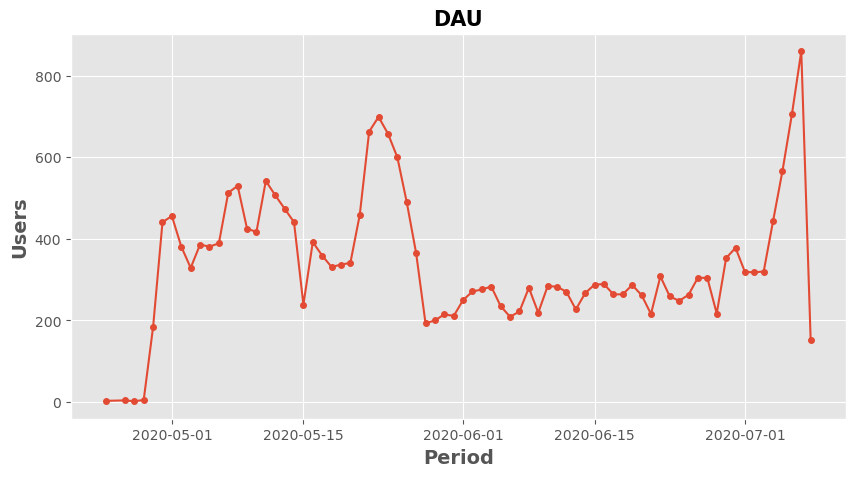

In [19]:
plt.figure(figsize=(10,5))
plt.plot(df_1.index, df_1['user_id'],  marker = 'o', markersize = 4)
plt.title('DAU', fontweight="bold", fontsize=15)
plt.xlabel('Period', fontweight="bold", fontsize=14)
plt.ylabel('Users',fontweight="bold", fontsize = 14)

In [21]:
df.dtypes

user_id          float64
Timestamp         object
order_id           int64
category_code     object
brand             object
price            float64
dtype: object

In [22]:
df['Timestamp'] = pd.to_datetime(df.Timestamp)

C:\Users\Anna\AppData\Local\Temp\ipykernel_11796\2489362554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df.Timestamp)


In [24]:
df.dtypes

user_id                 float64
Timestamp        datetime64[ns]
order_id                  int64
category_code            object
brand                    object
price                   float64
week                      int64
dtype: object

In [25]:
df['week'] = df.Timestamp.apply(lambda x: x.week)

C:\Users\Anna\AppData\Local\Temp\ipykernel_11796\1377466567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df.Timestamp.apply(lambda x: x.week)


In [26]:
df.dtypes

user_id                 float64
Timestamp        datetime64[ns]
order_id                  int64
category_code            object
brand                    object
price                   float64
week                      int64
dtype: object

In [27]:
df.head()

,user_id,Timestamp,order_id,category_code,brand,price,week
0,1.515916e+18,2020-04-24,2294359932054536986,electronics.tablet,samsung,162.01,17
1,1.515916e+18,2020-04-24,2294359932054536986,electronics.tablet,samsung,162.01,17
2,1.515916e+18,2020-04-24,2294444024058086220,electronics.audio.headphone,huawei,77.52,17
3,1.515916e+18,2020-04-24,2294444024058086220,electronics.audio.headphone,huawei,77.52,17
4,1.515916e+18,2020-04-24,2294584263154074236,NaN,karcher,217.57,17


In [28]:
df['month'] = df.Timestamp.apply(lambda x: x.month)

C:\Users\Anna\AppData\Local\Temp\ipykernel_11796\3645036251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.Timestamp.apply(lambda x: x.month)


In [29]:
df_2 = df.groupby('week'). agg({'user_id' : 'nunique'})

In [30]:
df_2

,user_id
week,
17,7
18,1718
19,2878
20,2761
21,3149
22,2138
23,1616
24,1703
25,1765


Text(0, 0.5, 'Users')

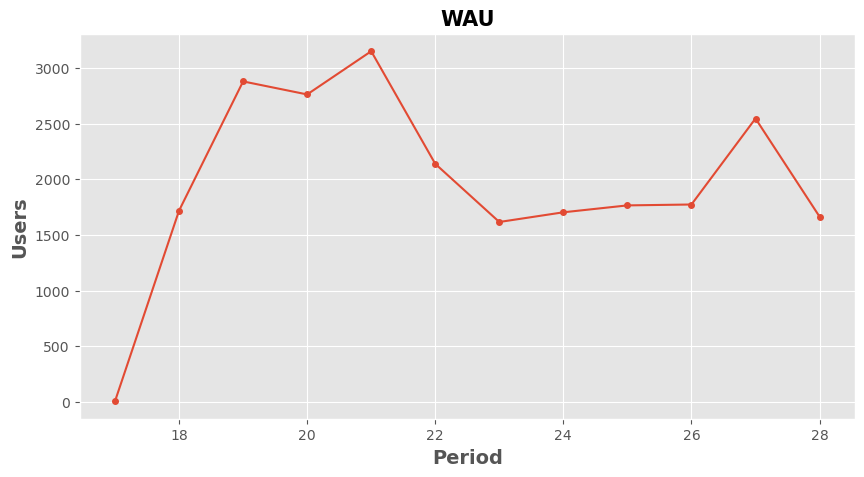

In [31]:
plt.figure(figsize=(10,5))
plt.plot(df_2.index, df_2['user_id'],  marker = 'o', markersize = 4)
plt.title('WAU', fontweight="bold", fontsize=15)
plt.xlabel('Period', fontweight="bold", fontsize=14)
plt.ylabel('Users',fontweight="bold", fontsize = 14)

In [34]:
df_3 = df.groupby('month'). agg({'user_id' : 'nunique'})
df_3

,user_id
month,
4,623
5,10962
6,6960
7,3455


Text(0, 0.5, 'Users')

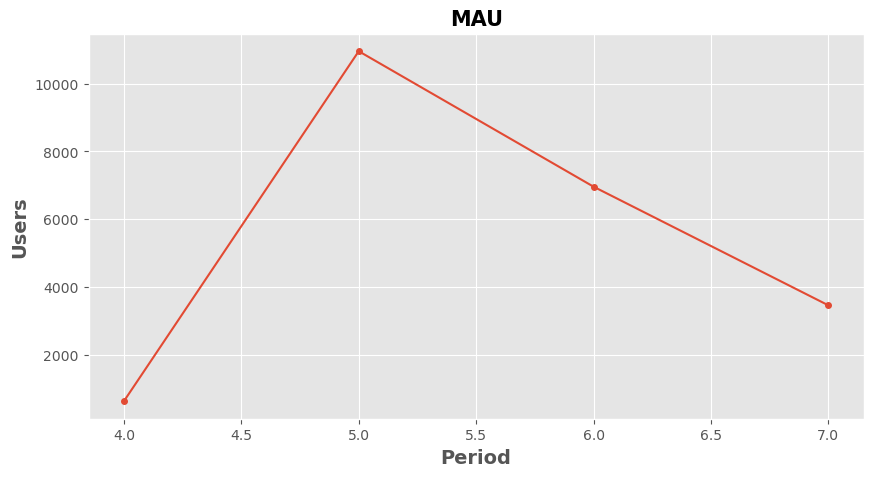

In [33]:
plt.figure(figsize=(10,5))
plt.plot(df_3.index, df_3['user_id'],  marker = 'o', markersize = 4)
plt.title('MAU', fontweight="bold", fontsize=15)
plt.xlabel('Period', fontweight="bold", fontsize=14)
plt.ylabel('Users',fontweight="bold", fontsize = 14)

In [35]:
arpu_d = df.groupby('Timestamp'). agg({'price' : 'sum', 'user_id': 'nunique'})
arpu_d 

,price,user_id
Timestamp,,
2020-04-24,696.63,3
2020-04-26,6080.38,4
2020-04-27,690.87,2
2020-04-28,1548.46,5
2020-04-29,26882.14,184
...,...,...
2020-07-04,156789.00,444
2020-07-05,107471.50,567
2020-07-06,156373.66,705


In [36]:
arpu_d['arpu_d'] = arpu_d['price'] / arpu_d['user_id']

In [37]:
arpu_d

,price,user_id,arpu_d
Timestamp,,,
2020-04-24,696.63,3,232.210000
2020-04-26,6080.38,4,1520.095000
2020-04-27,690.87,2,345.435000
2020-04-28,1548.46,5,309.692000
2020-04-29,26882.14,184,146.098587
...,...,...,...
2020-07-04,156789.00,444,353.128378
2020-07-05,107471.50,567,189.544092
2020-07-06,156373.66,705,221.806610


Text(0, 0.5, '$')

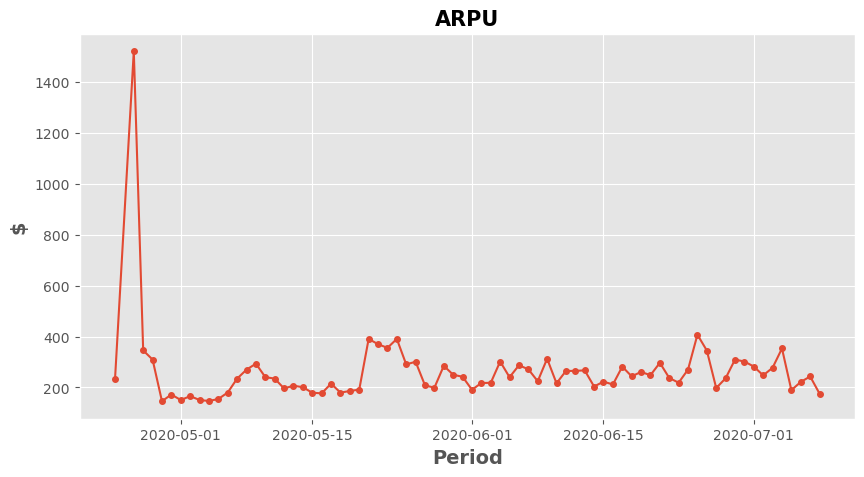

In [38]:
plt.figure(figsize=(10,5))
plt.plot(arpu_d.index, arpu_d['arpu_d'],  marker = 'o', markersize = 4)
plt.title('ARPU', fontweight="bold", fontsize=15)
plt.xlabel('Period', fontweight="bold", fontsize=14)
plt.ylabel('$',fontweight="bold", fontsize = 14)